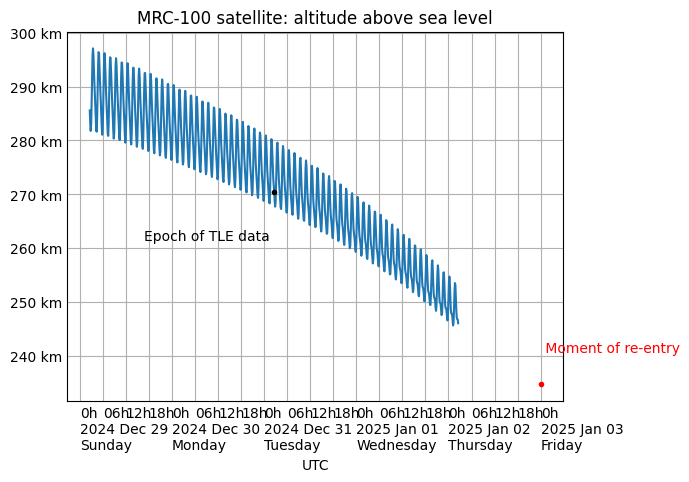

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.dates import HourLocator, DateFormatter

from skyfield.api import load, EarthSatellite

# Labels for both date and hour on the x axis, and km on y.

def label_dates_and_hours(axes):
    axes.xaxis.set_major_locator(HourLocator([0]))
    axes.xaxis.set_minor_locator(HourLocator([0, 6, 12, 18]))
    axes.xaxis.set_major_formatter(DateFormatter('0h\n%Y %b %d\n%A'))
    axes.xaxis.set_minor_formatter(DateFormatter('%Hh'))
    for label in ax.xaxis.get_ticklabels(which='both'):
        label.set_horizontalalignment('left')
    axes.yaxis.set_major_formatter('{x:.0f} km')
    axes.tick_params(which='both', length=0)

# Load the satellite's final TLE entry.

sat = EarthSatellite(
    '1 56993U 23084BV  24366.10991680  .01709050  19226-2  28219-2 0  9992',
    '2 56993  97.5241 134.5060 0009547 316.4566  43.5959 16.03508494 86703',
    'MRC-100',
)

# Build the time range `t` over which to plot, plus other values.

ts = load.timescale()
t = ts.tt_jd(np.arange(sat.epoch.tt - 2.0, sat.epoch.tt + 2.0, 0.005))
reentry = ts.utc(2025, 1, 3, 0, 0)
earth_radius_km = 6371.0

# Compute geocentric positions for the satellite.

g = sat.at(t)
valid = [m is None for m in g.message]

# Start a new figure.

fig, ax = plt.subplots()

# Draw the blue curve.

x = t.utc_datetime()
y = np.where(valid, g.distance().km - earth_radius_km, np.nan)
ax.plot(x, y)

# Label the TLE epoch.

x = sat.epoch.utc_datetime()
y = sat.at(sat.epoch).distance().km - earth_radius_km
ax.plot(x, y, 'k.')
ax.text(x, y - 9, 'Epoch of TLE data ', ha='right')

# Label the official moment of reentry.

x = reentry.utc_datetime()
y = sat.at(reentry).distance().km - earth_radius_km
ax.plot(x, y, 'r.')
ax.text(x, y + 6, ' Moment of re-entry', c='r')

# Grid lines and labels.

ax.grid(which='both')
ax.set(title='MRC-100 satellite: altitude above sea level', xlabel='UTC')
label_dates_and_hours(ax)

# Render the plot to a PNG file.

# fig.savefig('goce-reentry.png', bbox_inches='tight')